**Chapter 5 – Support Vector Machines**

A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing **linear or nonlinear classification, regression, and even outlier detection**. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited **for classification of complex small- or medium-sized datasets**.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/jdecorte/machinelearning/blob/main/050-support_vector_machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 0. Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Linear SVM Classification

- We explain SVM by comparing it with Logistic Regression (see previous chapter). 
- The figure below shows part of the iris dataset. 
![](img/large_margin_classification_plot.png)  
**Observations**:
- The two classes can clearly be separated easily with a straight line (they are linearly separable). 
- The left plot shows the decision boundaries of three possible linear classifiers. 
- The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly. 
- The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably not
perform as well on new instances. 
- In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two
classes but also stays as far away from the closest training instances as possible. 
- You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes. 
- This is called _large margin classification_.
- Adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the _support vectors_(they are circled in the figure).

**Warning**:
SVMs are sensitive to the feature scales: 
- In the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible street is close to horizontal. 
- After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary in the right plot looks much better.
![](img/sensitivity_to_feature_scales_plot.png)


## Soft Margin Classification
**Hard Margin Classification**: 
- We strictly impose that all instances must be off the street and on the right side. 
- Two main issues: 
    - it only works if the data is linearly separable.
    - it is sensitive to outliers: the figure shows the iris dataset with just one additional outlier. 
![](img/sensitivity_to_outliers_plot.png)
        - on the left, it is impossible to find a hard margin 
        - on the right (with another outlier), the decision boundary ends up very different from the one we saw above without the outlier, and it will probably not generalize as well (the "street is too small")

**Soft Margin Classification**: 
- This is a more flexible model. 
- The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e.,
instances that end up in the middle of the street or even on the wrong side).
- In Scikit-Learn you can specify the hyperparameter **C**: 
    - low: model on the left
    - high: model on the right
![](img/regularization_plot.png)
- Margin violations are bad: it’s usually better to have few of them. 
- However, in this case the model on the left has a lot of margin violations but will probably generalize better.

The following Scikit-Learn code loads the iris dataset, scales the features, and then trains a
linear SVM model (using the LinearSVC class with C=1 and the hinge loss function,
described shortly) to detect Iris virginica flowers:

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**NOTE**  
Unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.

# Nonlinear SVM Classification
- Linear SVM classifiers are efficient and work surprisingly well in many cases.
- But: many datasets are not even close to being linearly separable.
- One approach to handling nonlinear datasets is to add more features, such as polynomial features (see Chapter 4).
- In some cases this can result in a linearly separable dataset.
- Example: add $x_2 = (x_1)^2$ as extra feature -> the resulting 2D dataset is now perfectly linearly separable: 

![](img/higher_dimensions_plot.png)



Implement this idea using Scikit-Learn: create a Pipeline
- PolynomialFeatures transformer (see Chapter 4)
- StandardScaler
- LinearSVC

We test this on the moons dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles:

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\jcor864\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

![](img/moons_polynomial_svc_plot.png)

## Polynomial Kernel

- Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs). 
- At a **low polynomial degre**e, this method **cannot deal with very complex datasets**.
- With a **high polynomial degree** it creates a huge number of features, making the **model too slow**.
- Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the _kernel trick_ (explained in a moment). 
    - **Get the same result** as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. 
    - There is **no combinatorial explosion of the number of features** because you don’t actually add any features. 
    - This trick is **implemented by the SVC class**. 
    
Let’s test it on the moons dataset:

In [6]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

- This code trains an SVM classifier using a 3d-degree polynomial kernel. It is represented on the left if the figure below. 
- The code below does the same but now for a 10th-degree polynomial. It is represented on the right if the figure. 
- Hyperparameter `coef0` controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

![](img/moons_kernelized_polynomial_svc_plot.png)

**TIP**

- A common approach to finding the right hyperparameter values is to use grid search (see Chapter 2). 
- It is often faster to first do a very coarse grid search, then a finer grid search around the best values found.
- Having a good sense of what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.

## Computational Complexity

- LinearSVC: 
    - does not support kernel trick
    - scales almost linear with the number of training instances and the number of features: training time $\sim O(m \times n)$.
    - takes longer if you require very high precision: controlled by the tolerance hyperparameter $ϵ$ (called tol in Scikit-Learn). In most classification tasks, the
default tolerance is fine. 
- SVC class: 
    - supports kernel trick
    - training time complexity is usually between $O(m^2 \times n)$ and $O(m^3 \times n)$
    - very slow when number of training instances gets large (e.g., hundreds of thousands of instances).
    - perfect for complex small or medium-sized training sets.
    - scales well with the number of features, especially with _sparse_ features (i.e., when each instance has few nonzero features): scales roughly with the average number of nonzero features per
instance.


# SVM Regression
To use SVMs for regression instead of classification, the trick is to reverse the objective: 
- instead of trying to fit the largest possible street between two classes while limiting margin violations
- tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).
- width of the street is controlled by a hyperparameter, $ϵ$ (epsilon).
- The figure shows two linear SVM Regression models trained on some random linear data, one with a large margin ($ϵ$ = 1.5) and the other with a small margin ($ϵ$ = 0.5).
![](img/svm_regression_plot.png)

The following code produces the model represented on the left (the training data should be scaled and centered first):

In [7]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [8]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

- To tackle **nonlinear regression tasks**, you can use a kernelized SVM model. 
- The figure below shows SVM Regression on a random quadratic training set, using a second-degree polynomial kernel. 
- There is little regularization in the left plot (i.e., a large  `C` value), and much more regularization in the right plot (i.e., a small `C` value).
![](img/svm_with_polynomial_kernel_plot.png)

The following code uses Scikit-Learn’s SVR class (which supports the kernel trick) to produce the model represented on the left.

In [9]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

**Code to generate Figure 5–11. SVM Regression using a second-degree polynomial kernel**

In [ ]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


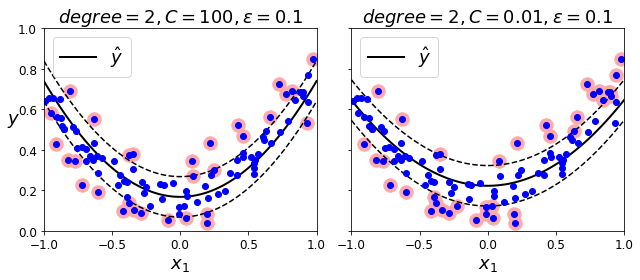

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

## Computational Complexity
- The `LinearSVR` class scales linearly with the size of the training set (just like the LinearSVC class)
- The `SVR` class gets much too slow when the training set grows large (just like the SVC class).